<a href="https://colab.research.google.com/github/MaykonDias/Alura-Store-Challenge/blob/main/Alura_challeger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja_1 = pd.read_csv(url)
loja_2 = pd.read_csv(url2)
loja_3 = pd.read_csv(url3)
loja_4 = pd.read_csv(url4)

loja_1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# **1. Análise do faturamento**


In [2]:
faturamento_1 = loja_1['Preço'].sum()
faturamento_2 = loja_2['Preço'].sum()
faturamento_3 = loja_3['Preço'].sum()
faturamento_4 = loja_4['Preço'].sum()

print(f"faturamento da loja 1 é R${faturamento_1:,.2f}")
print(f"faturamento da loja 2 é R${faturamento_2:,.2f}")
print(f"faturamento da loja 3 é R${faturamento_3:,.2f}")
print(f"faturamento da loja 4 é R${faturamento_4:,.2f}")



faturamento da loja 1 é R$1,534,509.12
faturamento da loja 2 é R$1,488,459.06
faturamento da loja 3 é R$1,464,025.03
faturamento da loja 4 é R$1,384,497.58


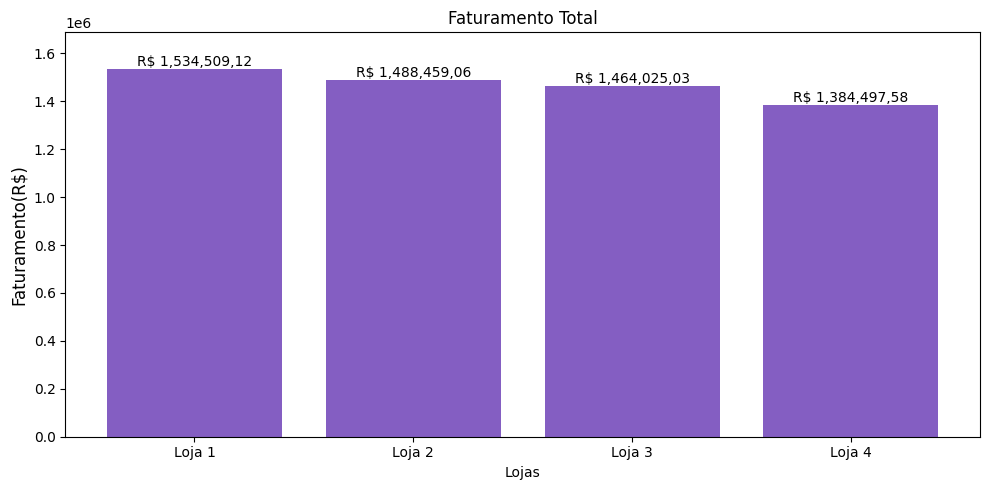

In [3]:
total_faturamento = [faturamento_1, faturamento_2, faturamento_3, faturamento_4]
lojas_conj = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
plt.figure(figsize=(10, 5))
grafico_faturamento = plt.bar(lojas_conj, total_faturamento, color ="#845EC2")
plt.title("Faturamento Total",)
plt.xlabel("Lojas")
plt.ylim(0, max(total_faturamento)*1.1)
plt.ylabel("Faturamento(R$)",fontsize=12)
plt.tight_layout()

#formatar o valor com virgulas
labels_formatados = [f'R$ {valor:,.2f}'.replace('.', ',') for valor in total_faturamento]

plt.bar_label(grafico_faturamento, labels = labels_formatados)
plt.show()

# **2. Vendas por Categoria**


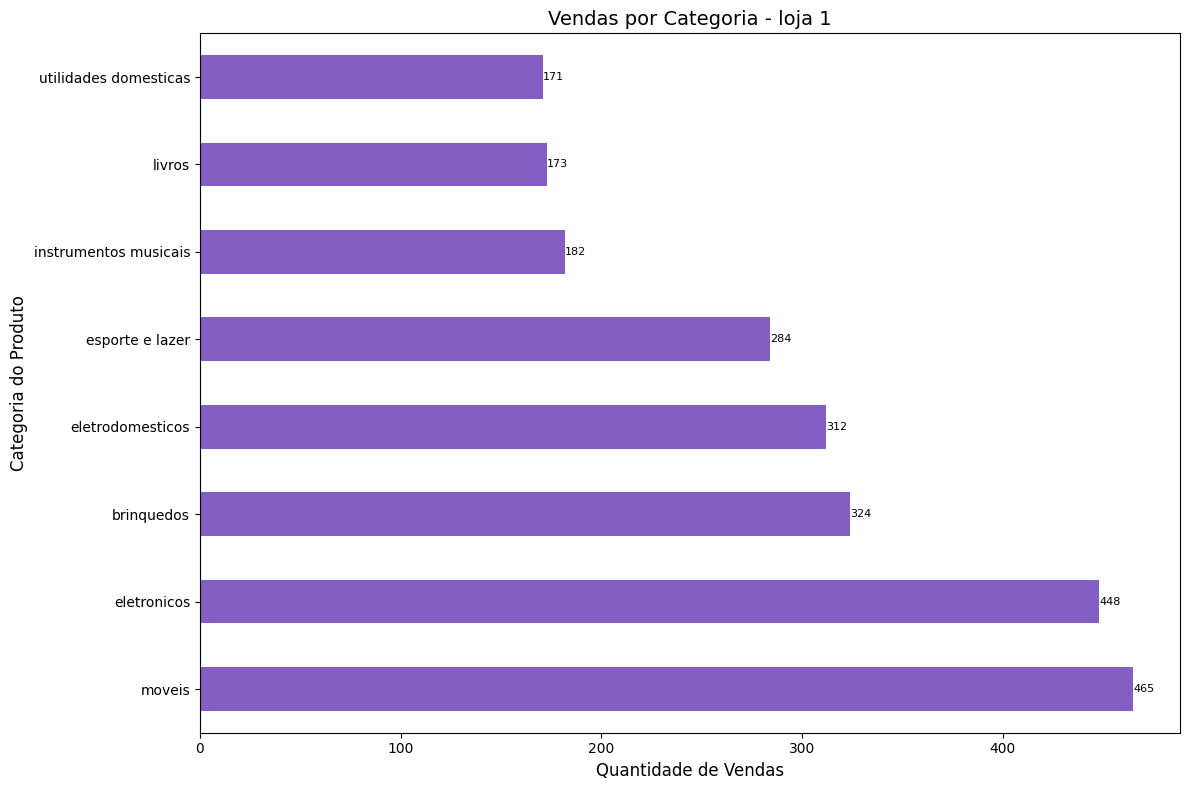

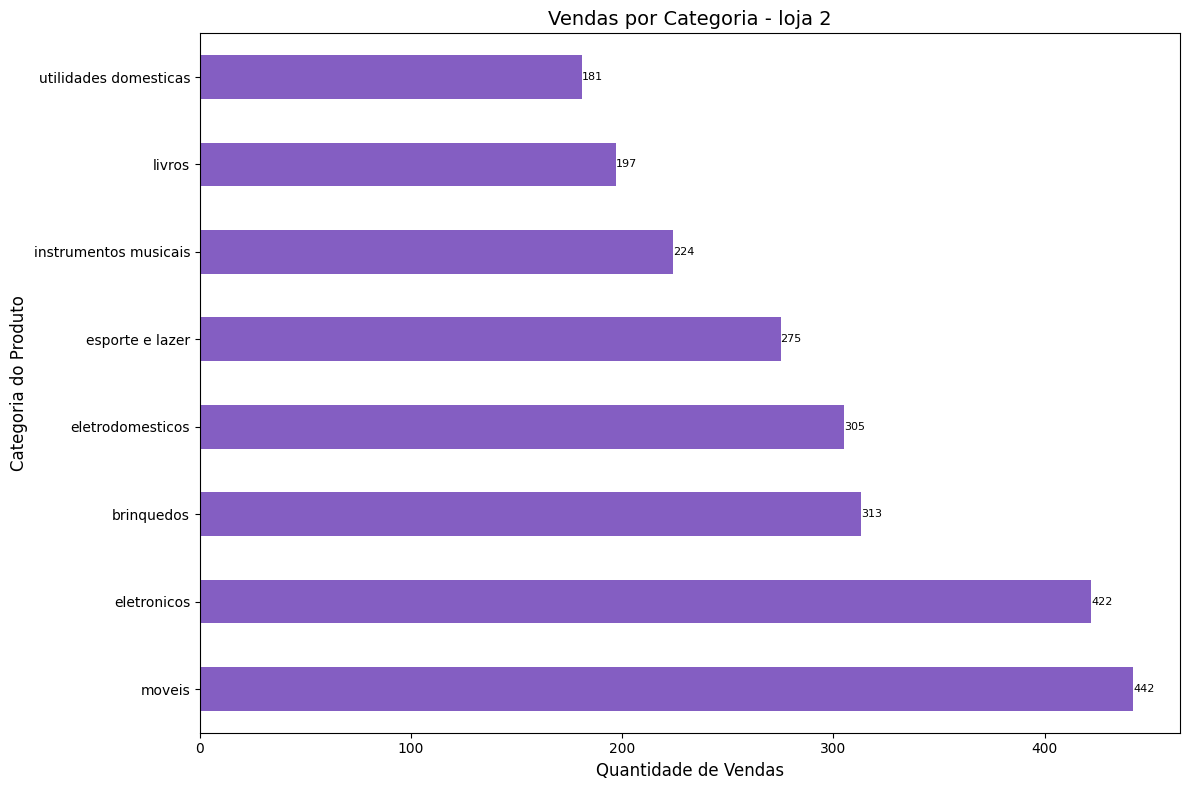

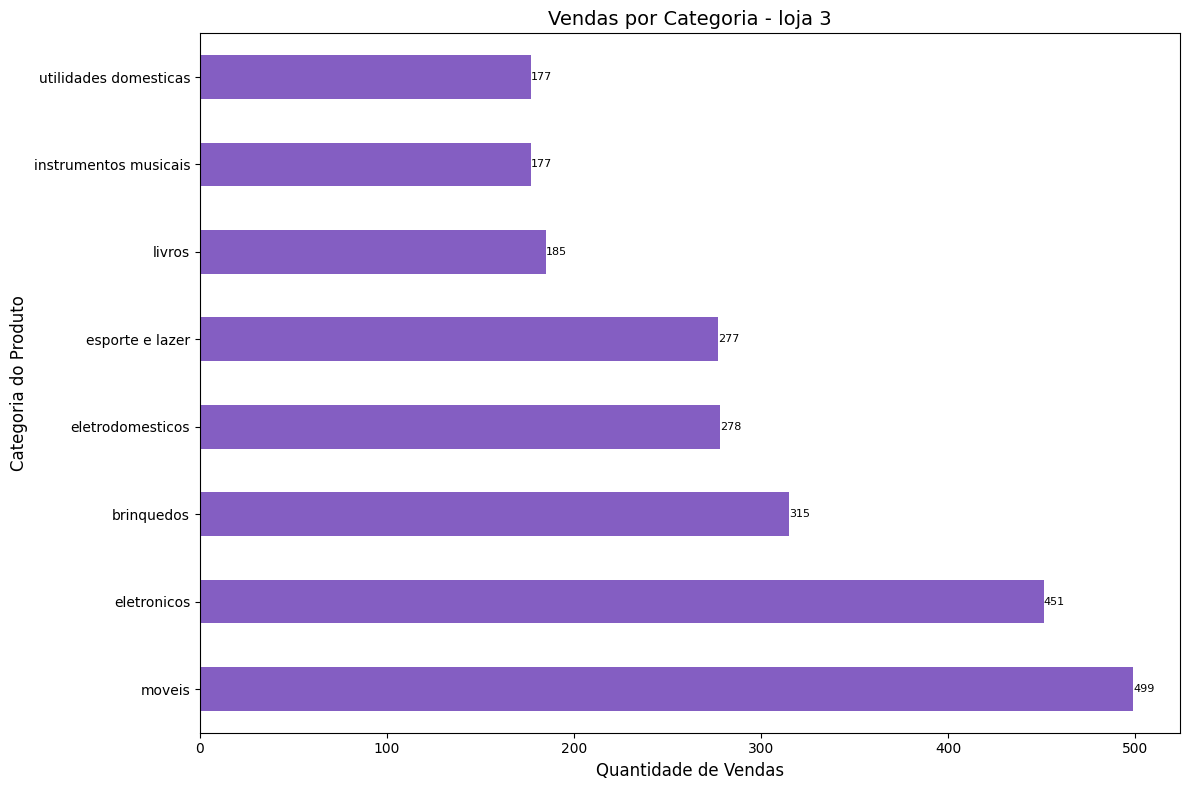

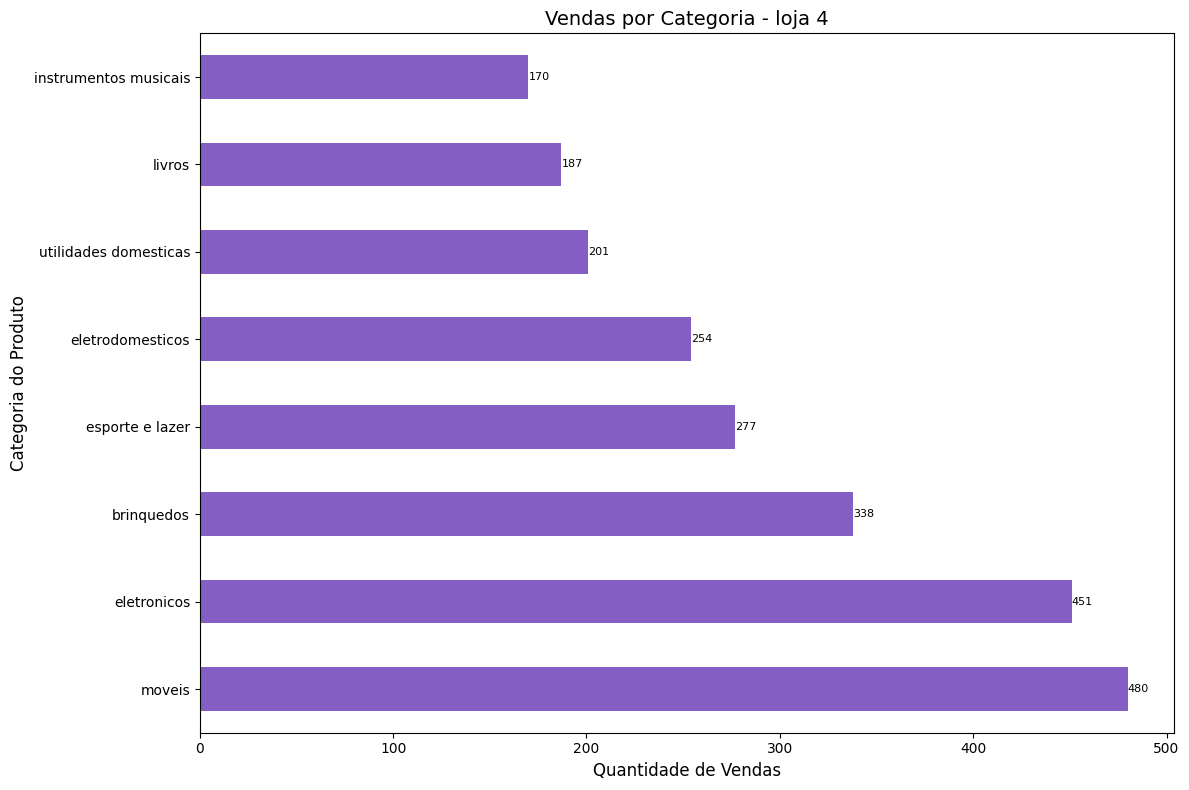

In [4]:
def vendas_categoria(df, loja):
  qts_vendas = df["Categoria do Produto"].value_counts()

  plt.figure(figsize=(12, 8))
  ax = qts_vendas.plot(kind="barh", color="#845EC2")

  plt.title(f'Vendas por Categoria - {loja}', fontsize=14)
  plt.xlabel("Quantidade de Vendas", fontsize=12)
  plt.ylabel("Categoria do Produto", fontsize=12)
  ax.bar_label(ax.containers[0], fontsize = 8, color="black")
  plt.tight_layout()
  plt.show()

vendas_categoria(loja_1, "loja 1")
vendas_categoria(loja_2, "loja 2")
vendas_categoria(loja_3, "loja 3")
vendas_categoria(loja_4, "loja 4")

# **3. Média de Avaliação das Lojas**


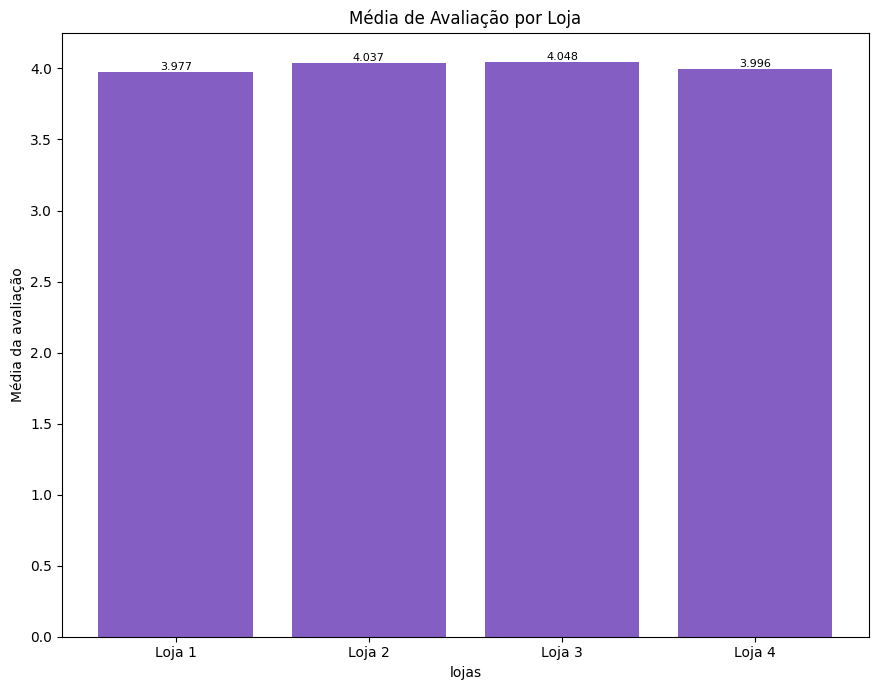

In [5]:
media_loja1 = loja_1['Avaliação da compra'].mean()
media_loja2 = loja_2['Avaliação da compra'].mean()
media_loja3 = loja_3['Avaliação da compra'].mean()
media_loja4 = loja_4['Avaliação da compra'].mean()

media_total={
    "Loja 1": media_loja1,
    "Loja 2": media_loja2,
    "Loja 3": media_loja3,
    "Loja 4": media_loja4

}
nome_lojas=  list(media_total.keys())
todas_medias = list(media_total.values())
media_arrend = [f'{valor:.3f}' for valor in todas_medias]

#grafico
plt.figure(figsize=(9,7))
plt.title("Média de Avaliação por Loja")
plt.xlabel("lojas")
plt.ylabel("Média da avaliação")
plt.tight_layout()
grafico_media = plt.bar(nome_lojas, todas_medias, color="#845EC2")
plt.bar_label(grafico_media, labels = media_arrend, fontsize=8, color="black")
plt.show()


# **4. Produtos Mais e Menos Vendidos**



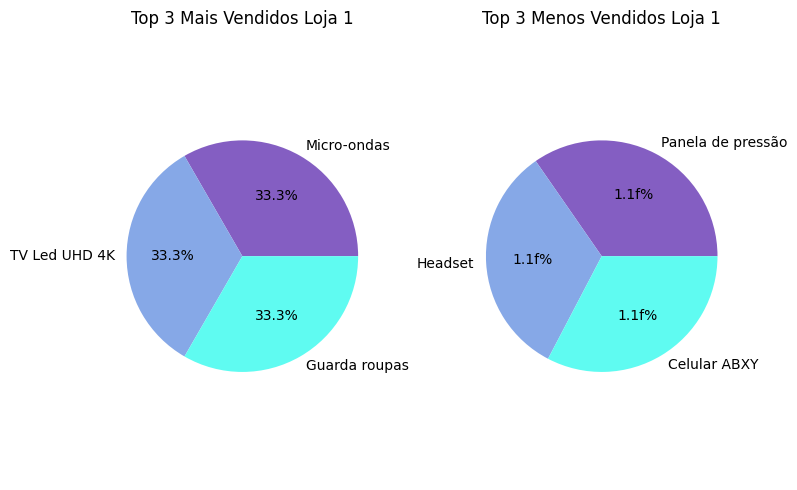

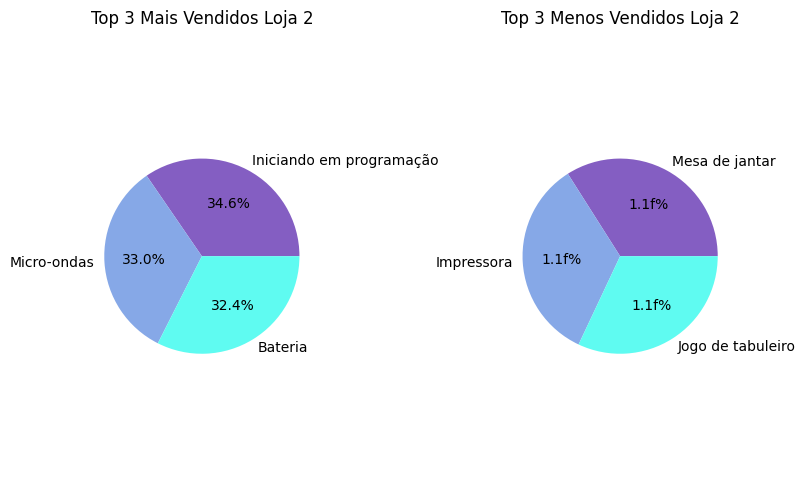

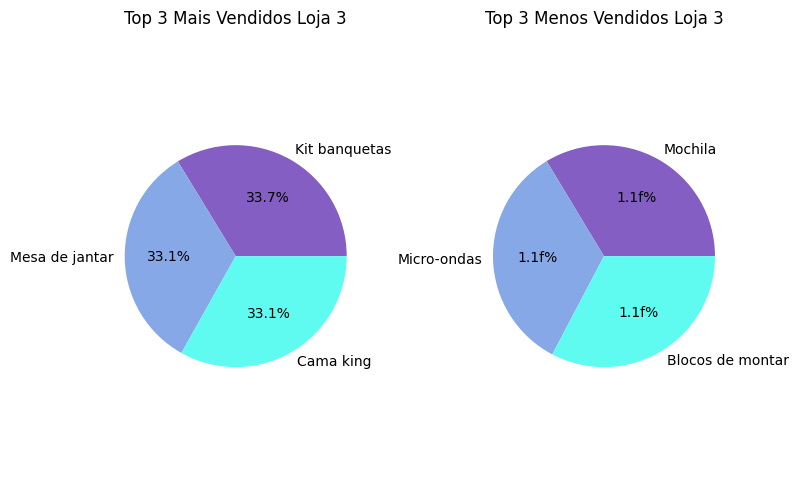

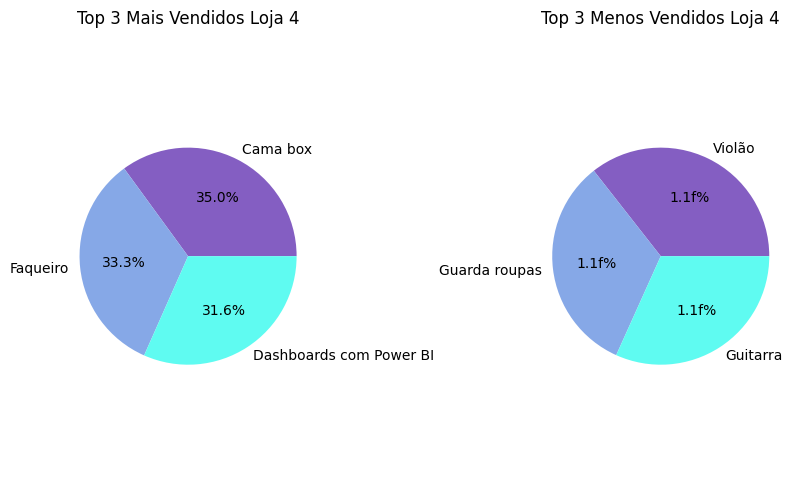

In [6]:
def produto_max_min(df, nome_loja):
  contagem = df["Produto"].value_counts()

  max_contagem = contagem.head(3)
  min_contagem = contagem.tail(3)

  fig, axs = plt.subplots(1,2, figsize=(8,5))
  grafico_1 = axs[0].pie(max_contagem.values, labels = max_contagem.index, autopct = "%1.1f%%", colors = ["#845EC2", "#86A8E7", "#5FFBF1"])
  axs[0].set_title(f'Top 3 Mais Vendidos {nome_loja}')
  axs[0].axis("equal")


  grafico_2 = axs[1].pie(min_contagem.values, labels = min_contagem.index, autopct ="1.1f%%", colors = ["#845EC2", "#86A8E7", "#5FFBF1"])
  axs[1].set_title(f'Top 3 Menos Vendidos {nome_loja}')
  axs[1].axis("equal")

  plt.tight_layout()
  plt.show()


produto_max_min(loja_1, "Loja 1")
produto_max_min(loja_2, "Loja 2")
produto_max_min(loja_3, "Loja 3")
produto_max_min(loja_4, "Loja 4")

# **5. Frete Médio por Loja**

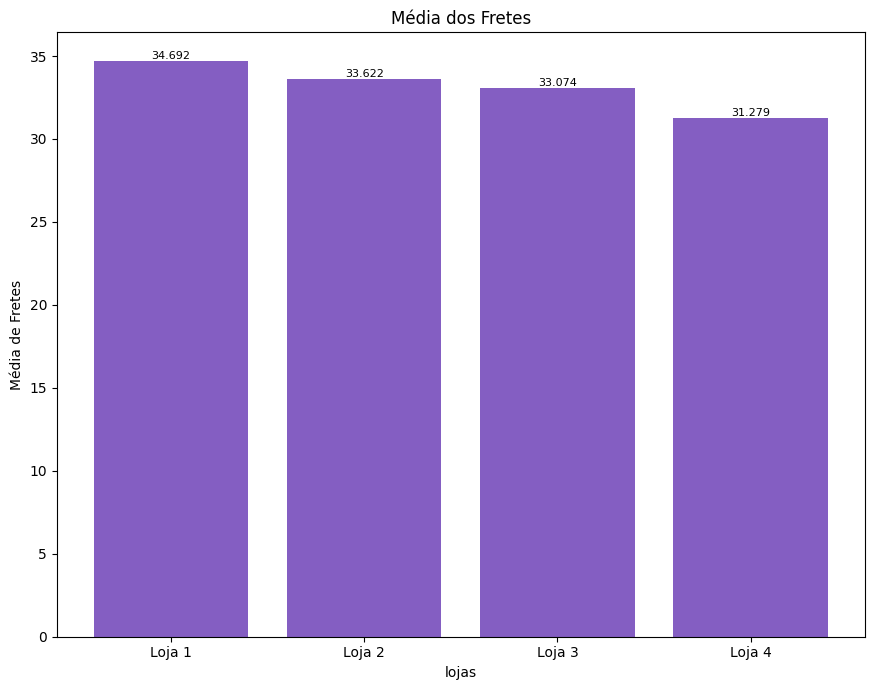

In [7]:
media_frete_loja1 = loja_1["Frete"].mean()
media_frete_loja2 = loja_2["Frete"].mean()
media_frete_loja3 = loja_3["Frete"].mean()
media_frete_loja4 = loja_4["Frete"].mean()

medias_frete_totais={
    "Loja 1": media_frete_loja1,
    "Loja 2": media_frete_loja2,
    "Loja 3": media_frete_loja3,
    "Loja 4": media_frete_loja4

}
nome_lojas_frete =  list(medias_frete_totais.keys())
todas_medias_frete = list(medias_frete_totais.values())

media_arrend_frete = [f'{valor:.3f}' for valor in todas_medias_frete]

#grafico
plt.figure(figsize=(9,7))
plt.title("Média dos Fretes")
plt.xlabel("lojas")
plt.ylabel("Média de Fretes")
plt.tight_layout()
grafico_media_frete = plt.bar(nome_lojas_frete, todas_medias_frete, color="#845EC2")
plt.bar_label(grafico_media_frete, labels = media_arrend_frete, fontsize=8, color="black")
plt.show()


# **5. Frete Médio por Loja**


In [8]:
Pedidos_por_estados = pd.concat([loja_1[["lat", "lon","Local da compra"]], loja_1[["lat", "lon", "Local da compra"]],loja_1[["lat", "lon", "Local da compra"]],loja_1[["lat", "lon", "Local da compra"]]], ignore_index=True)
Pedidos_por_estados
Quantidades_por_estados =  Pedidos_por_estados["Local da compra"].value_counts()
Pedidos_por_estados['Quantidade por Estado'] = Pedidos_por_estados['Local da compra'].map(Quantidades_por_estados)
Pedidos_por_estados

,lat,lon,Local da compra,Quantidade por Estado
0,-22.19,-48.79,SP,3936
1,-22.25,-42.66,RJ,1192
2,-15.83,-47.86,DF,212
3,-30.17,-53.50,RS,620
4,-18.10,-44.38,MG,1060
...,...,...,...,...
9431,-22.25,-42.66,RJ,1192
9432,-22.19,-48.79,SP,3936
9433,-24.89,-51.55,PR,512
9434,-5.81,-36.59,RN,36


In [12]:
grafico = px.density_mapbox(Pedidos_por_estados, lon="lon", lat ="lat", z="Quantidade por Estado", mapbox_style="open-street-map", zoom = 3,radius=10)
grafico.update_layout(margin={"r": 0, "t": 0, "b": 0, "l":0})
grafico.show()
grafico.write_image("grafico.png")


# **Relatório:**
**Faturamento Total:**

loja 1: R$1,534,509.12 <--- Maior Faturamento

loja 2: R$1,488,459.06

Loja 3: R$1,464,025.03

Loja 4: R$1,384,497.58 <--- Menor Faturamento

**Média de Avaliações:**

Loja 1: 3.977 <--- Maior Média

Loja 2: 4.037

Loja 3: 4.048

Loja 4: 3.996 <--- Menor Média

**Média dos Fretes:**

Loja 1: 34.692 <-- Maior Média de Frete

Loja 2: 33.622

Loaj 3: 33.074

Loja 4: 31.279 <--- Menor Média

**Pedidos por Estados:**

1 - São Paulo

2 - Belo Horizonte

3 - Distrito Federal

4 - Minas Gerais


Percebemos que a maiores concentrações de pedidos estao localizado nas maiores capitais do país.

**Conclusão:**

Portanto o Sr. Jão tem que investir no empreendimento da "**Loja 4**" pois teve o menor desempenho em todas as categorias comparativas.